# DeepMeta : Run inference
This is an example to show how to run prediction with DeepMeta.


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

import DeepMeta.predict as p
import DeepMeta.utils.data as data
import DeepMeta.utils.global_vars as gv

%matplotlib inline

## Load data
First we need to load a mouse:

In [7]:
img_path = os.path.join(gv.PATH_DATA, "Souris_Test/PL_ssiso_1.tif")
mouse = data.get_predict_dataset(img_path, contrast=False)

Once your mouse loaded, verify its shape and look at it.

In [ ]:
print(np.shape(mouse))

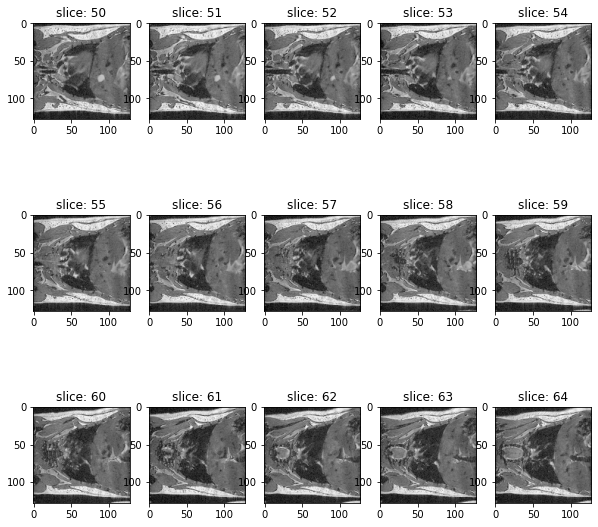

In [9]:
fig = plt.figure(figsize=(10,10))
columns = 5
rows = 3

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = mouse[50+i]
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("slice: "+str(50+i))
    plt.imshow(img, cmap="gray")
plt.show()

## Segment lungs
Once you are satisfied of your input, choose a trained model to do inference :

In [13]:
path_model_lungs = "../data/saved_models/Poumons/best_seg_model_weighted.h5"
seg_lungs = p.predict_seg(mouse, path_model_lungs).reshape(128, 128, 128)

Here `seg_lungs` is the raw output from the network.
We can look at it:

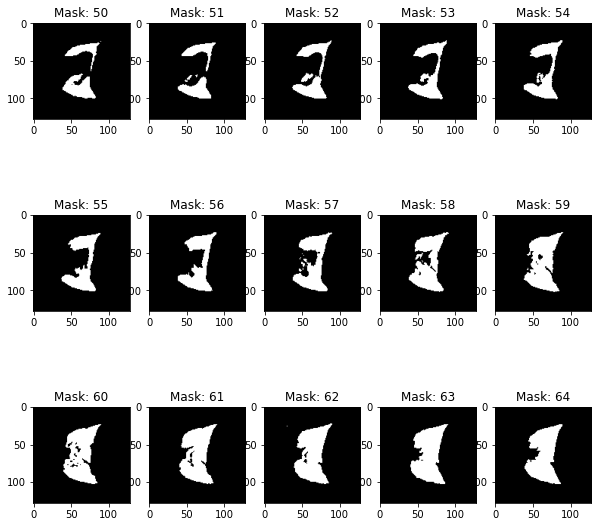

In [14]:
fig = plt.figure(figsize=(10,10))
columns = 5
rows = 3

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = seg_lungs[50+i]
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Mask: "+str(50+i))
    plt.imshow(img, cmap="gray")
plt.show()

This result is not so bad, but we can improve it with a post processing pipeline:

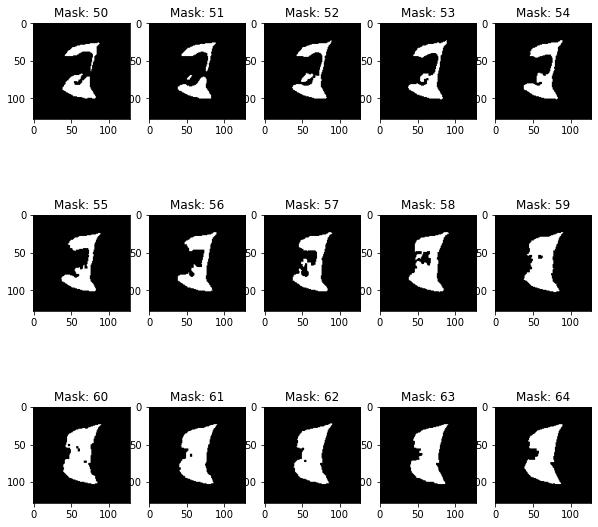

In [15]:
seg_lungs = p.postprocess_loop(seg_lungs)

fig = plt.figure(figsize=(10,10))
columns = 5
rows = 3

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = seg_lungs[50+i]
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Mask: "+str(50+i))
    plt.imshow(img, cmap="gray")
plt.show()

Our masks are better, but we do not see if they fit perfectly on our images.
To have a better view, we will draw the masks borders on the mouse images.

 # TODO
 draw masks border on images

## Segment metastasis

Now we can segment metastasis

In [ ]:
path_model_seg_metas = "../data/saved_models/Metastases/best_seg_model_weighted.h5"
seg_metas = seg_lungs * p.predict_seg(mouse, path_model_seg_metas).reshape(128, 128, 128)

In [ ]:
fig = plt.figure(figsize=(10,10))
columns = 5
rows = 3

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = seg_metas[50+i]
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Mask: "+str(50+i))
    plt.imshow(img, cmap="gray")
plt.show()

Like previously, we can enhance our result with a post processing pipeline.

In [ ]:
seg_metas = p.postprocess_meta(seg_metas, k1=3, k2=3)

fig = plt.figure(figsize=(10,10))
columns = 5
rows = 3

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = seg_metas[50+i]
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Mask: "+str(50+i))
    plt.imshow(img, cmap="gray")
plt.show()

We can now draw our masks borders on our images.

 # TODO
 draw masks border on images